In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

In [39]:
b72_df = pd.read_csv('./B72_7MA_14MA_PS.csv')

b72_df['OrderDate'] = pd.to_datetime(b72_df['OrderDate'], format='%Y-%m-%d %H:%M:%S', errors='raise') 

b72_df['YYYYMM'] = b72_df['YYYYMM'].astype(str)       #YYYYMM string

In [40]:
b72_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderDate  1250 non-null   datetime64[ns]
 1   YYYYMM     1250 non-null   object        
 2   YYYYWEEK   1250 non-null   int64         
 3   ORDERQTY   1250 non-null   int64         
 4   7MA        1244 non-null   float64       
 5   14MA       1237 non-null   float64       
 6   PS         1250 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 68.5+ KB


In [33]:
b72_df = b72_df.dropna()
b72_df

,OrderDate,YYYYMM,YYYYWEEK,ORDERQTY,7MA,14MA,PS
13,2018-01-19,201801,20183,30,62.71,96.00,99.4
14,2018-01-22,201801,20184,40,61.29,92.29,99.4
15,2018-01-23,201801,20184,250,96.71,100.86,99.4
16,2018-01-24,201801,20184,110,100.29,105.50,99.4
17,2018-01-26,201801,20184,48,105.43,105.07,99.4
...,...,...,...,...,...,...,...
1245,2022-09-26,202209,202239,83,111.29,92.07,98.0
1246,2022-09-27,202209,202239,45,112.00,90.29,98.0
1247,2022-09-28,202209,202239,20,96.86,89.93,98.0
1248,2022-09-29,202209,202239,80,93.57,92.79,98.0


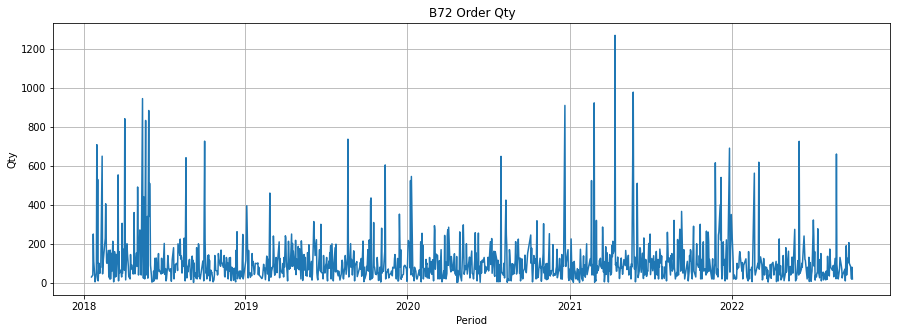

In [34]:
plt.figure(figsize=(15, 5)) 

plt.title('B72 Order Qty')
plt.ylabel('Qty')
plt.xlabel('Period')
plt.grid()

plt.plot(b72_df['OrderDate'], b72_df['ORDERQTY'])
plt.show()

In [35]:
# 정규성 검정 Shapiro - Test
shapiro_test = shapiro( b72_df['ORDERQTY'])

## 귀무가설 : 해당 데이터가 정규성을 충족한다

In [36]:
print(shapiro_test)

ShapiroResult(statistic=0.6346765756607056, pvalue=2.802596928649634e-45)


### P값이 0.05(일반적인 귀무가설 검정 임계치 수준)보다 높기에, 해당 데이터는 정규성을 충족한다

### 는 귀무가설을 유의하게 기각-> 정규성 미충족

In [37]:
corr = b72_df.corr()
print(corr)

            YYYYMM  YYYYWEEK  ORDERQTY       7MA      14MA        PS
YYYYMM    1.000000 -0.042101 -0.043822 -0.097737 -0.122920  0.218896
YYYYWEEK -0.042101  1.000000  0.011384  0.023212  0.036206 -0.088917
ORDERQTY -0.043822  0.011384  1.000000  0.419833  0.306074  0.054939
7MA      -0.097737  0.023212  0.419833  1.000000  0.767069  0.135493
14MA     -0.122920  0.036206  0.306074  0.767069  1.000000  0.190162
PS        0.218896 -0.088917  0.054939  0.135493  0.190162  1.000000


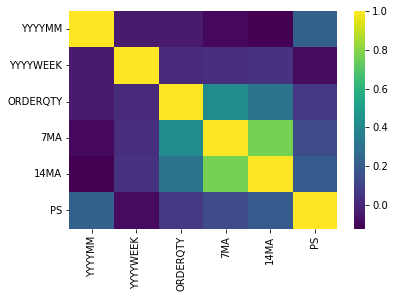

In [38]:
sns.heatmap(corr, cmap='viridis')
plt.show()

In [46]:
# 주단위 집계
b72_df.groupby(['YYYYWEEK']).sum()

,ORDERQTY,7MA,14MA,PS
YYYYWEEK,,,,
20181,321,0.00,0.00,397.6
20182,636,357.58,0.00,497.0
20183,387,400.70,96.00,497.0
20184,453,452.72,476.01,497.0
20185,1429,886.44,689.93,601.2
...,...,...,...,...
202235,257,584.14,458.57,394.6
202236,223,358.57,438.49,392.0
202237,415,332.29,500.93,490.0


In [57]:
b72w_df = pd.read_excel('./B72W_7MA_14MA_PS.xlsx')

In [58]:
b72w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YYYYWEEK  247 non-null    int64  
 1   OrderQty  247 non-null    int64  
 2   7MA       247 non-null    float64
 3   14MA      247 non-null    float64
 4   PS        247 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 9.8 KB


In [59]:
b72w_df

,YYYYWEEK,OrderQty,7MA,14MA,PS
0,201803,30,62.71,96.00,99.4
1,201804,453,452.72,476.01,99.4
2,201805,1429,886.44,689.93,101.0
3,201806,369,926.43,743.35,101.0
4,201807,795,450.86,542.21,101.0
...,...,...,...,...,...
242,202235,257,584.14,458.57,99.3
243,202236,223,358.57,438.49,98.0
244,202237,415,332.29,500.93,98.0
245,202238,656,528.15,423.79,98.0


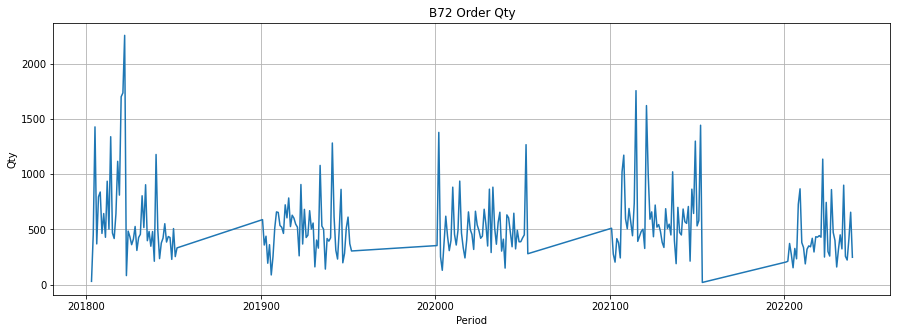

In [60]:
plt.figure(figsize=(15, 5)) 

plt.title('B72 Order Qty')
plt.ylabel('Qty')
plt.xlabel('Period')
plt.grid()

plt.plot(b72w_df['YYYYWEEK'], b72w_df['OrderQty'])
plt.show()

In [61]:
corr = b72w_df.corr()
print(corr)

          YYYYWEEK  OrderQty       7MA      14MA        PS
YYYYWEEK  1.000000 -0.111954 -0.129523 -0.151856  0.223363
OrderQty -0.111954  1.000000  0.805135  0.642064  0.098792
7MA      -0.129523  0.805135  1.000000  0.856571  0.118468
14MA     -0.151856  0.642064  0.856571  1.000000  0.151667
PS        0.223363  0.098792  0.118468  0.151667  1.000000


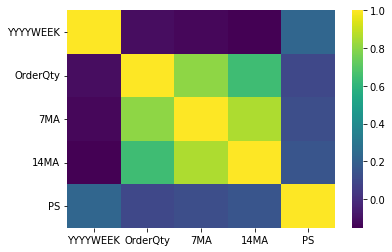

In [62]:
sns.heatmap(corr, cmap='viridis')
plt.show()